In [1]:
import gudhi
import numpy as np
import matplotlib.pyplot as plt
from helper_function import *


In [2]:
paths = ["ivyClass/ant"]
max_edge = 50  # Maximum edge length for the Rips complex
max_dim = 2     # Maximum dimension for Betti numbers
interval = np.linspace(0, 1, 100)  # Interval for Betti curves



In [3]:
# Step 1: Extract embeddings
embeddings = time_execution(extract_embeddings, paths=paths)




Processing path: /scratch/zzhang30/cs420/data/ivyClass/ant
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/IvyAntSettings.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/IvyDependencyTree.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/IvyConflict.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/IvyExclude.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/IvyConvertPom.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/Range.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/IvyListModules.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/Ignore.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/IvyExtractFromSources.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/DeliverDRResolver.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/AddPathTask.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass/ant/Mapping.json
Parsing file: /scratch/zzhang30/cs420/data/ivyClass

In [4]:
embeddings

array([[ 0.99005473,  3.47771835,  1.3027997 , ...,  0.22184664,
        -1.91226113, -0.74508166],
       [-1.41541433,  1.41792715, -0.87390977, ..., -0.37223542,
         0.0095014 , -1.06853938],
       [ 0.43395433,  0.80100745,  1.02711046, ..., -0.22605343,
        -2.34333611,  1.50433528],
       ...,
       [ 0.9279229 ,  1.80230057,  0.78469795, ..., -0.12794682,
        -1.2411015 , -0.06914413],
       [ 2.87480283,  1.33663321, -0.46528059, ...,  0.12858815,
        -1.64123893,  0.11596291],
       [ 2.03484917,  2.21022415,  0.0387735 , ..., -0.30921596,
        -0.00561002,  0.21864565]])

In [4]:


# Step 2: Build the Rips complex
simplex_tree = time_execution(build_rips_complex, embeddings, max_edge, max_dim=max_dim, verbose=True)



Rips complex: dimension 2, simplices 307874, vertices 140
build_rips_complex executed in 0.0261 seconds


In [6]:
simplex_tree

In [9]:
def betti_curves_from_simplex_tree(st, I, dim=3):
    '''
    Computes the Betti curves of the given simplex tree

    Input:
        st: a simplex tree
        I: interval over which to calculate the Betti curves
        dim: maximal dimension to compute the Betti curves.

    Returns:
        BettiCurves: array representing the Betti curves
    '''
    st.persistence(persistence_dim_max=True, homology_coeff_field = 2)
    Diagrams = [st.persistence_intervals_in_dimension(i) for i in range(dim+1)]
    BettiCurves = []
    step_x = I[1]-I[0]
    for diagram in Diagrams:
        bc =  np.zeros(len(I))
        if diagram.size != 0:
            diagram_int = np.clip(np.ceil((diagram[:,:2] - I[0]) / step_x), 0, len(I)).astype(int)
            for interval in diagram_int:
                bc[interval[0]:interval[1]] += 1
        BettiCurves.append(np.reshape(bc,[1,-1]))
    return np.reshape(BettiCurves, (dim+1, len(I)))

In [5]:
 I = 50 * np.linspace(0,1,100)
Betti_curves = betti_curves_from_simplex_tree(simplex_tree, I)

# # Save betti curves to an image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(1,3,1); ax2 = fig.add_subplot(1,3,2); ax3 = fig.add_subplot(1,3,3)
# ax1.step(I, Betti_curves[0])
# ax2.step(I, Betti_curves[1])
# ax3.step(I, Betti_curves[2])
# plt.show()


NameError: name 'betti_curves_from_simplex_tree' is not defined

In [11]:
Betti_curves

array([[7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01,
        7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01,
        7.00000e+01, 6.90000e+01, 6.90000e+01, 6.90000e+01, 6.90000e+01,
        6.90000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01,
        6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01,
        6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01,
        6.80000e+01, 6.80000e+01, 6.70000e+01, 6.70000e+01, 6.70000e+01,
        6.70000e+01, 6.50000e+01, 6.40000e+01, 6.40000e+01, 6.20000e+01,
        6.00000e+01, 5.90000e+01, 5.80000e+01, 5.70000e+01, 5.40000e+01,
        5.00000e+01, 4.70000e+01, 4.50000e+01, 4.30000e+01, 4.00000e+01,
        3.80000e+01, 3.60000e+01, 3.30000e+01, 2.90000e+01, 2.70000e+01,
        2.40000e+01, 2.30000e+01, 2.30000e+01, 2.30000e+01, 2.30000e+01,
        2.20000e+01, 2.10000e+01, 2.00000e+01, 2.00000e+01, 1.80000e+01,
        1.80000e+01, 1.80000e+01, 1.80000e+01, 1.70

In [ ]:
    ''' Plot and save barcode and persistence diagram:'''
    barcode = simplex_tree.persistence(homology_coeff_field = 2)
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
    gudhi.plot_persistence_barcode(barcode, axes = ax1)
    gudhi.plot_persistence_diagram(barcode, axes = ax2)



In [6]:
interval = 50 * np.linspace(0, 1, 100)
betti_curves = time_execution(calculate_betti_curves, simplex_tree, interval, max_dim=max_dim)

calculate_betti_curves executed in 1.5814 seconds


In [7]:
betti_curves

array([[7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01,
        7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01, 7.00000e+01,
        7.00000e+01, 6.90000e+01, 6.90000e+01, 6.90000e+01, 6.90000e+01,
        6.90000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01,
        6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01,
        6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01, 6.80000e+01,
        6.80000e+01, 6.80000e+01, 6.70000e+01, 6.70000e+01, 6.70000e+01,
        6.70000e+01, 6.50000e+01, 6.40000e+01, 6.40000e+01, 6.20000e+01,
        6.00000e+01, 5.90000e+01, 5.80000e+01, 5.70000e+01, 5.40000e+01,
        5.00000e+01, 4.70000e+01, 4.50000e+01, 4.30000e+01, 4.00000e+01,
        3.80000e+01, 3.60000e+01, 3.30000e+01, 2.90000e+01, 2.70000e+01,
        2.40000e+01, 2.30000e+01, 2.30000e+01, 2.30000e+01, 2.30000e+01,
        2.20000e+01, 2.10000e+01, 2.00000e+01, 2.00000e+01, 1.80000e+01,
        1.80000e+01, 1.80000e+01, 1.80000e+01, 1.70

Saved Betti curves to /scratch/zzhang30/cs420/figure/ivy_main_class_betti_curves.png


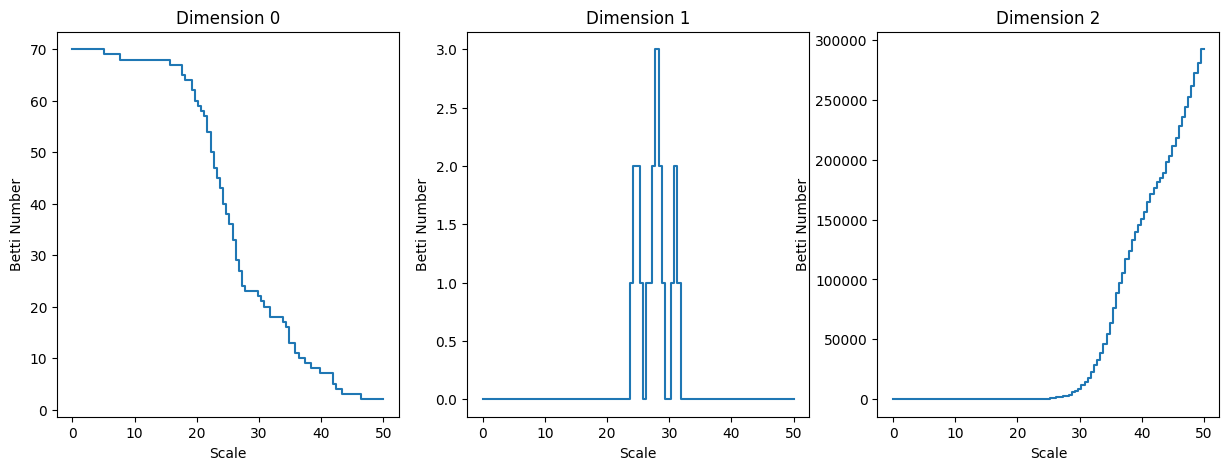

In [8]:
visualize_betti_curves(betti_curves, interval, output_name="ivy_main_class_betti_curves")